In [1]:
import pandas as pd
from tqdm import tqdm
import nimblephysics as nimble
import matplotlib.pyplot as plt
import fastparquet as fp
import os
import numpy as np

/home/zjiay/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/zjiay/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:

base_dir = '/datasets/AddBiomechanics/raw_data/'
output_dir='/datasets/AddBiomechanics/processed_data/'

In [3]:
my_subject = nimble.biomechanics.SubjectOnDisk('/datasets/AddBiomechanics/raw_data/Moore2015_Formatted_No_Arm/subject16/subject16.b3d')

In [15]:
ff = my_subject.readFrames(1, 0, 1000)

coords_all = []
# iterate through every frame
for i, a in enumerate(ff):
    ss = a.processingPasses[1]
    coords = ss.jointCentersInRootFrame
    coords=coords.reshape(-1,3)
    coords_all.append(coords)  # Correct usage of append


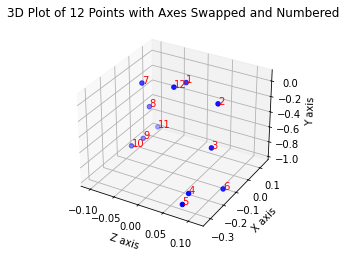

In [49]:
coords=coords_all[0]
# Swapping x, y, z to z, x, y
coords_swapped = coords[:, [2, 0, 1]]

# Create a 3D plot with labeled points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the swapped points
ax.scatter(coords_swapped[:, 0], coords_swapped[:, 1], coords_swapped[:, 2], c='b', marker='o')

# Annotating the points with their order
for i in range(len(coords_swapped)):
    ax.text(coords_swapped[i, 0], coords_swapped[i, 1], coords_swapped[i, 2], f'{i+1}', color='red')

# Label the axes
ax.set_xlabel('Z axis')
ax.set_ylabel('X axis')
ax.set_zlabel('Y axis')

# Title of the plot
ax.set_title('3D Plot of 12 Points with Axes Swapped and Numbered')

# Show the plot
plt.show()





In [53]:
import matplotlib.animation as animation

# Set up the figure and axis for animation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
scatter = ax.scatter([], [], [], c='b', marker='o')

# Function to update each frame in the animation
def update(frame):
    ax.clear()
    # Swap x, y, z to z, x, y
    coords_swapped = coords_all[frame][:, [2, 0, 1]]
    
    # Update the scatter plot
    scatter = ax.scatter(coords_swapped[:, 0], coords_swapped[:, 1], coords_swapped[:, 2], c='b', marker='o')
    
    # Annotating the points with their order
    for i in range(len(coords_swapped)):
        ax.text(coords_swapped[i, 0], coords_swapped[i, 1], coords_swapped[i, 2], f'{i+1}', color='red')
    
    # Setting axis labels
    ax.set_xlabel('Z axis')
    ax.set_ylabel('X axis')
    ax.set_zlabel('Y axis')
    ax.set_title(f'3D Plot of 12 Points - Frame {frame}')
    
    return scatter,

# Number of frames (1000)
frames = 1000

# Creating the animation
ani = animation.FuncAnimation(fig, update, frames=frames, interval=10, blit=False)

# Saving the animation as a video
ani.save('/home/zjiay/workspace/locomotion-data-standardization/AddBiomechanics/walking_demo.gif', writer='ffmpeg')

plt.close()


MovieWriter ffmpeg unavailable; using Pillow instead.


In [17]:
print(coords_all[0][0])

[0.00000000e+00 0.00000000e+00 3.46944695e-18]


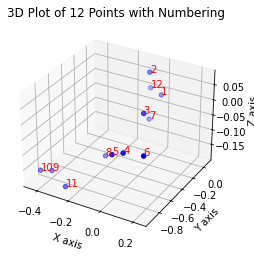

In [175]:
# Create the original 3D plot with numbered points

coords_reshaped = coords.reshape(-1, 3)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x_vals = coords_reshaped[:, 0]
y_vals = coords_reshaped[:, 1]
z_vals = coords_reshaped[:, 2]
# Plot the points
ax.scatter(x_vals, y_vals, z_vals, c='b', marker='o')

# Annotate the points with numbers
for i in range(len(x_vals)):
    ax.text(x_vals[i], y_vals[i], z_vals[i], f'{i+1}', color='red')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of 12 Points with Numbering')

# Show the plot
plt.show()


In [4]:
# This file is meant to verify the correctness of the implementation of the
# standardization of the data

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


#matplotlib widget
# Load the data
base_dir = '/datasets/AddBiomechanics/processed_data/'

# Started to process
dataset = 'Falisse2017'
dataset = 'Wang2023'
dataset = 'vanderZee2022'
dataset = 'Tan2022'
dataset = 'Fregly2012'
dataset = 'Camargo2021'
dataset = 'Moore2015'
dataset = 'Hamner2013'

# Not started
dataset = 'Santos2017'
dataset = 'Tan2022'
dataset = 'Tan2021'
dataset = 'Han2023'
dataset = 'Tiziana2019'
dataset = 'Carter2023'


dataset = 'Han2023'
file_version = 'time'
file_name = f'{base_dir}{dataset}_{file_version}.parquet'

data = pd.read_parquet(file_name)
data.columns

Index(['subject', 'subject_mass', 'task', 'frame_number', 'time', 'comPos_x_c',
       'comPos_y_c', 'comPos_z_c', 'comVel_x_c', 'comVel_y_c', 'comVel_z_c',
       'contact_r', 'contact_l', 'mtpPos_x_r', 'mtpPos_y_r', 'mtpPos_z_r',
       'mtpPos_x_l', 'mtpPos_y_l', 'mtpPos_z_l', 'grf_x_r', 'grf_y_r',
       'grf_z_r', 'grf_x_l', 'grf_y_l', 'grf_z_l', 'cop_x_r', 'cop_y_r',
       'cop_z_r', 'cop_x_l', 'cop_y_l', 'cop_z_l', 'pelvis_angle_s',
       'pelvis_angle_f', 'pelvis_angle_t', 'hip_angle_s_r', 'hip_angle_f_r',
       'hip_angle_t_r', 'knee_angle_s_r', 'ankle_angle_s_r', 'ankle_angle_t_r',
       'hip_angle_s_l', 'hip_angle_f_l', 'hip_angle_t_l', 'knee_angle_s_l',
       'ankle_angle_s_l', 'ankle_angle_t_l', 'dorsi_angle_r', 'dorsi_angle_l',
       'shank_angle_r', 'shank_angle_l', 'thigh_angle_r', 'thigh_angle_l',
       'shank_vel_r', 'shank_vel_l', 'thigh_vel_r', 'thigh_vel_l',
       'ankle_vel_r', 'ankle_vel_l', 'pelvis_vel_s', 'pelvis_vel_f',
       'pelvis_vel_t', 'hip_vel_

In [5]:
print(data['task'].unique())

['20220520_worrier2_1' '20220520_worrier2_2' '20220520_worrier2_4'
 '20220513_worrier2_1' '20220513_worrier2_2' '20220513_worrier2_3'
 '20220524_chair_2' '20220524_chair_4' '20220524_idling_1'
 '20220524_squat_1' '20220524_squat_3' '20220524_squat_4'
 '20220524_taichi_2' '20220524_taichi_4' '20220524_tree_1'
 '20220524_tree_3' '20220524_treearms_2' '20220524_treearms_3'
 '20220614_worrier2_1' '20220614_worrier2_2' '20220614_worrier2_4'
 '20220513_chair_2' '20220513_chair_3' '20220513_sidestretch_2'
 '20220513_taichi_1' '20220513_taichi_2' '20220513_tree_1'
 '20220513_tree_2' '20220513_tree_3' '20220513_treearms_2'
 '20220513_treearms_3' '20220513_treearms_4' '20220614_tennisserve_1'
 '20220614_walk_1' '20220614_walk_3' '20220614_walk_4' '20220614_whirl_1'
 '20220614_worrier1_1' '20220614_worrier1_2' '20220614_worrier1_4'
 '20220520_chair_1' '20220520_chair_3' '20220520_chair_4'
 '20220520_idling_1' '20220520_idling_4' '20220520_idling_6'
 '20220520_squat_4' '20220520_taichi_5' '2022052

In [6]:
print(data['subject'].unique())

['s002' 's001' 's004' 's006' 's005' 's007']


In [13]:
filtered_df=data[(data['task']=="20220614_walk_4")]
print(filtered_df['subject'].unique())
mtppsxr=filtered_df['mtpPos_x_r']
accmt=filtered_df['time']

['s006']


In [14]:
print((filtered_df['subject_mass']).unique())


[48.99]


In [15]:
diffs = np.diff(accmt)
    
# Identify where the data is decreasing (negative difference)
decreasing_periods = diffs[diffs > 0]

# Calculate the rate of decrease (k) for these periods

print( np.mean(decreasing_periods))

0.00399400299850074


82.73260641249105
0.0
-0.004592521628369162


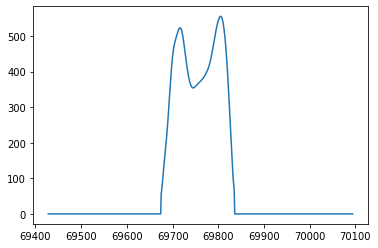

In [23]:
negthresh=min(filtered_df['grf_y_r']+filtered_df['grf_y_r'])
condition_array=(filtered_df['grf_y_r']>filtered_df['grf_y_l'])&(filtered_df['grf_y_r']+filtered_df['grf_y_l']>filtered_df['subject_mass']*9.81+negthresh-400)
tttp=mtppsxr[condition_array]
ffftt=filtered_df[condition_array]
print(min(ffftt['grf_y_r']))
print(min(filtered_df['grf_y_l']+filtered_df['grf_y_l']))
diffs = np.diff(tttp)
decreasing_periods = diffs[diffs < 0.01]
# Calculate the rate of decrease (k) for these periods

print( np.mean(decreasing_periods))

plt.plot(filtered_df['grf_y_l'])

Range for the highest bar: (-0.011528016402411648, -0.011403660260900311)


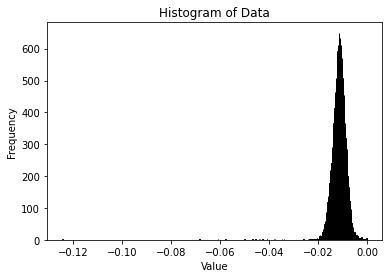

In [198]:
import statistics

counts, bin_edges, _ = plt.hist(decreasing_periods, bins=1000, edgecolor='black')

# Get the index of the bin with the highest frequency
max_bin_index = np.argmax(counts)

# Get the range for the highest bin
bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

# Print the range of the highest bar
print(f"Range for the highest bar: {bin_range}")

# Show the plot (optional)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [190]:
pcmptdf=filtered_df

In [182]:
print(pcmptdf['phase_r'])

535550   NaN
535551   NaN
535552   NaN
535553   NaN
535554   NaN
          ..
537045   NaN
537046   NaN
537047   NaN
537048   NaN
537049   NaN
Name: phase_r, Length: 1500, dtype: float64


In [191]:
pcmptdf=pcmptdf[pcmptdf['phase_r']>-1]

diffs = np.diff(pcmptdf['phase_r'])
decreasing_periods = diffs[(diffs >0)]
# Calculate the rate of decrease (k) for these periods

print( np.mean(decreasing_periods))

0.01188325435105741
